
# 2. Gradient Descent (Learning Rate Scheduler)

- In this implementation, we refine our first implementation by using the Learning Rate Scheduling
- It simply increases the learning rate as the number of epochs increases
- This is done because the gradients get smaller as the number of epochs increases, so we need to increase the learning rate to compensate for this to ensure that the model converges (updates the weights) in a reasonable amount of time
---

In [58]:
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable

np.random.seed(42)

In [59]:
def show_history(history: dict):
    """
    Display the training history in a tabular format.

    Args:
        history (dict): A dictionary containing the training history with keys as column names and values as lists of data points.
    """
    # Create a PrettyTable object to display the history
    table = PrettyTable()

    # Add each key and its corresponding values as a column in the table
    for key in history.keys():
        table.add_column(key, history[key])

    # Print the table
    print(table)

In [60]:
MAX_EPOCHS = 150 * 3
MAX_LOSS = 0.001

# Set target values for k and b
TARGET_K = np.random.randint(-10, 10)
TARGET_B = np.random.randint(-10, 10)

# Generate sample data
X = np.linspace(-100, 100, 200)
X = (X - np.mean(X)) / np.std(X)  # Normalize the data
# X - mean(X) simply sets the mean of X to 0
# X / std(X) simply sets the standard deviation of X to 1

y = TARGET_K * X + TARGET_B + np.random.normal(0, 1, len(X))

# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]


# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
split = 0.8
split = int(split * len(X))

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

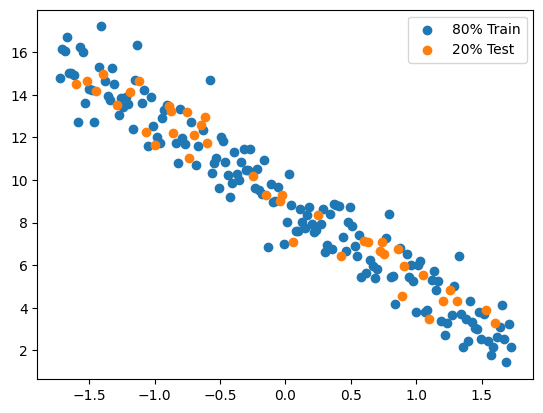

In [62]:
plt.scatter(X_train, y_train, label='80% Train')
plt.scatter(X_test, y_test, label='20% Test')
plt.legend()
plt.show()